Once the nodes are generated, there is two main stages for computing the quadrature matrix and weights associated to those nodes :

1. Compute the barycentric weights for the Lagrange polynomials
2. Integrate the Lagrange polynomials on given intervals

The original ('ORIG') algorithm in pySDC is based on :

1. BarycentricInterpolator from scipy.interpolate
2. quad function from scipy.integrate, with absolute tolerance of ``1e-14``


The new "optimized" implementation ('NEW'), added in the master branche since a few months, use those stages :

1. Modified BarycentricInterpolator from scipy.interpolate, computing the weights with log and exp (instead of product and inverse)
2. Legendre quadrature from numpy, using ``(n+1)//2`` nodes

There is now three possible future approaches, based on a custom LagrangeApproximation object that computes the barycentric weights (optimized product and inverse), with three different quadratures rules :

1. Fejer quadrature rule, with ``n-((n+1)%2)`` nodes ('FEJER')
2. Legendre quadrature from numpy, ``with (n+1)//2`` nodes ('LEGENDRE_NUMPY')
3. Legendre quadrature from scipy, ``with (n+1)//2`` nodes ('LEGENDRE_SCIPY')

The whole testing procedure for those algorithms is implemented in the adjoint ``quadrature.py`` file

In [1]:
import quadrature as quad

Below we set the number of random test :

- nInterTest : number of randomly generated interval close to ``[0, 1]``, on which the quadrature matrix and weights are generated
- nPolyTest : number of randomly generated polynomials on which the quadrature matrix and weights error are evaluated

In [2]:
quad.nPolyTest = 500
quad.nInterTest = 100

Then all experiment are performed, and for a given node distribution ('EQUID' or 'LEGENDRE')

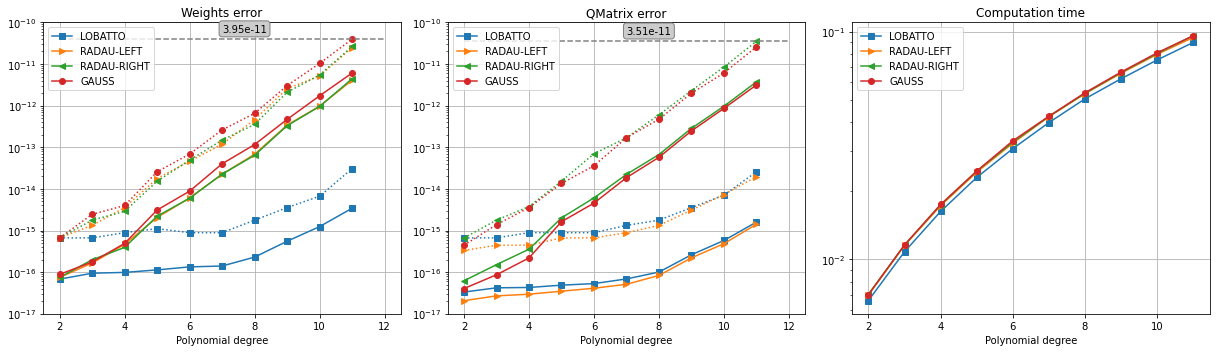

In [3]:
quad.plotQuadErrors('EQUID', 'ORIG')

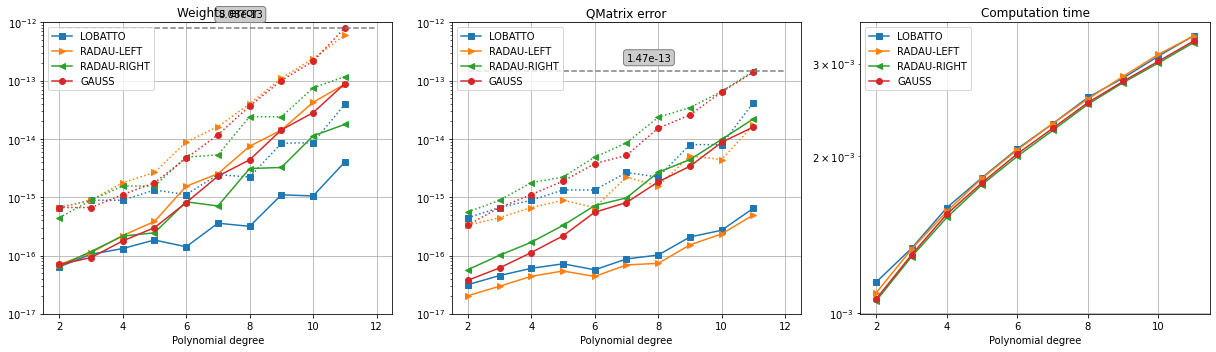

In [4]:
quad.plotQuadErrors('EQUID', 'NEW')

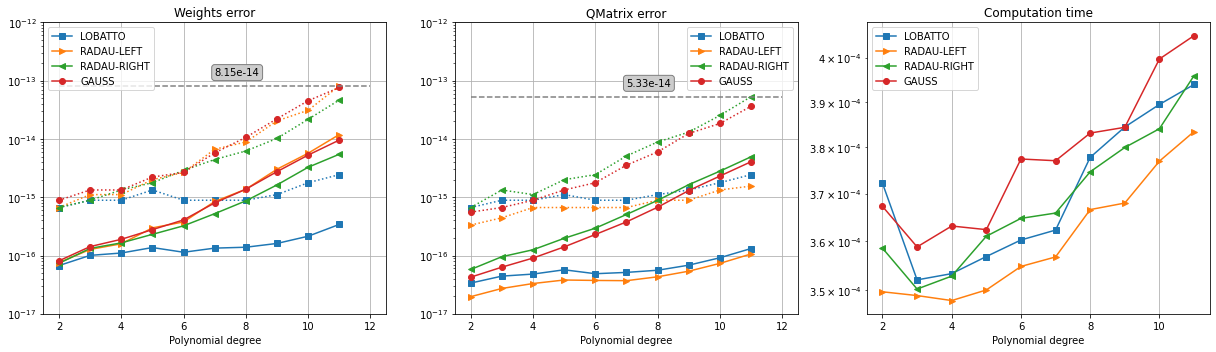

In [5]:
quad.plotQuadErrors('EQUID', 'FEJER')

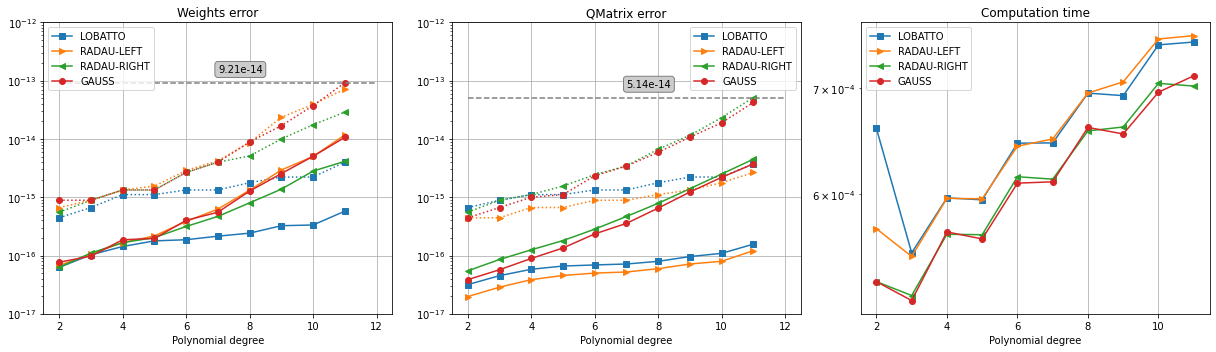

In [6]:
quad.plotQuadErrors('EQUID', 'LEGENDRE_NUMPY')

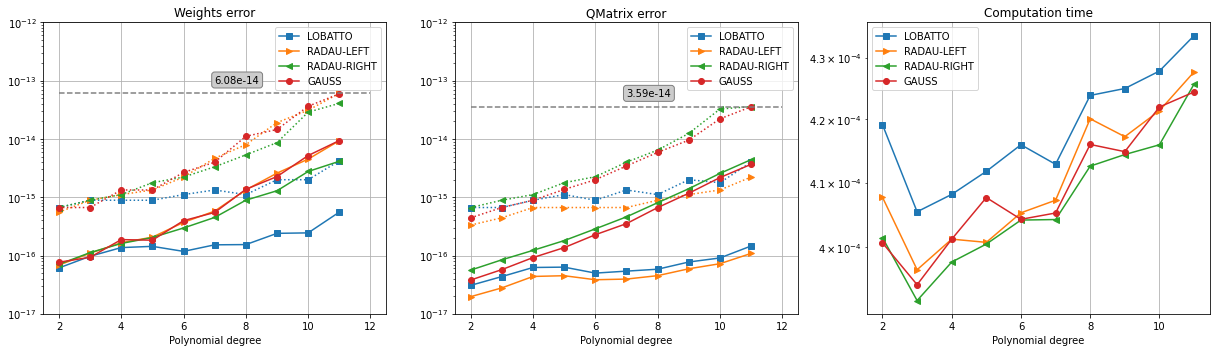

In [7]:
quad.plotQuadErrors('EQUID', 'LEGENDRE_SCIPY')

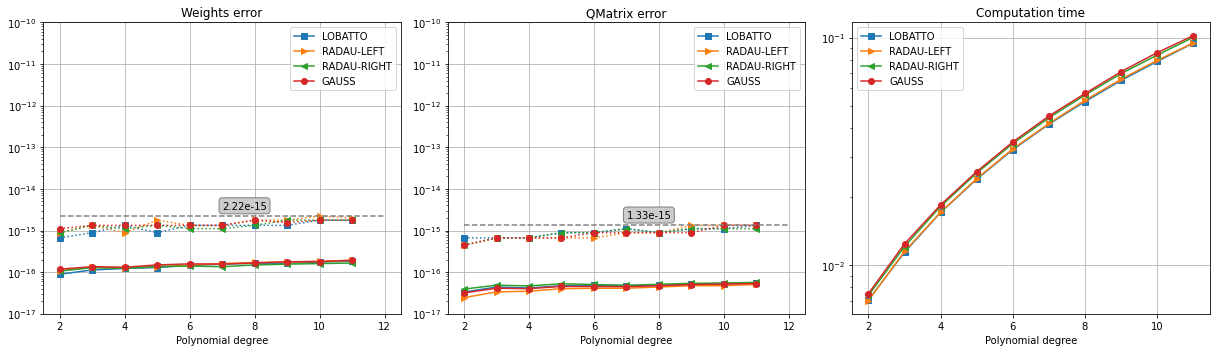

In [8]:
quad.plotQuadErrors('LEGENDRE', 'ORIG')

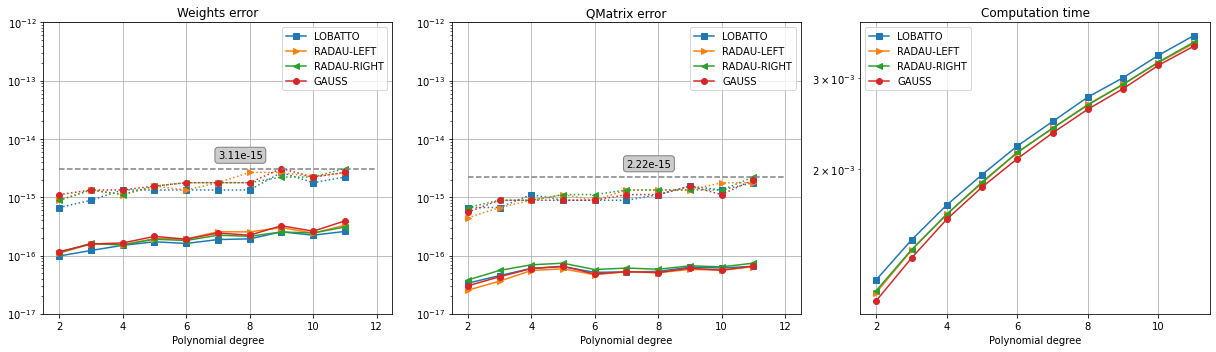

In [9]:
quad.plotQuadErrors('LEGENDRE', 'NEW')

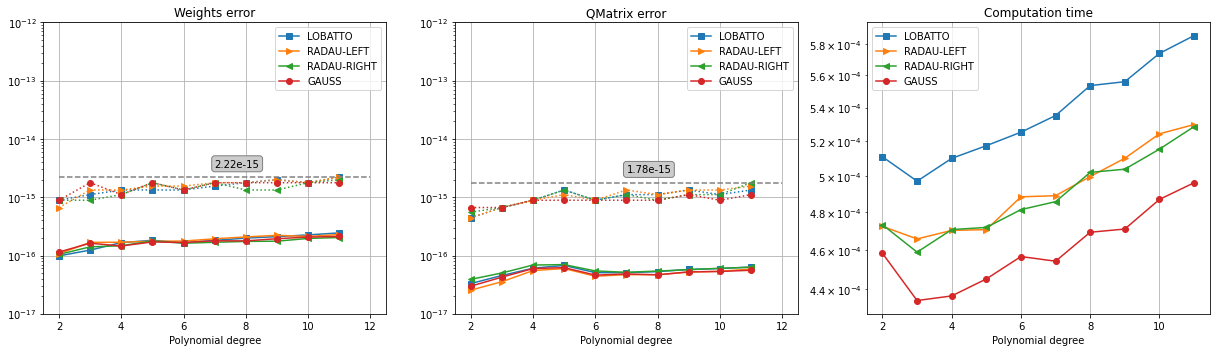

In [10]:
quad.plotQuadErrors('LEGENDRE', 'LEGENDRE_SCIPY')

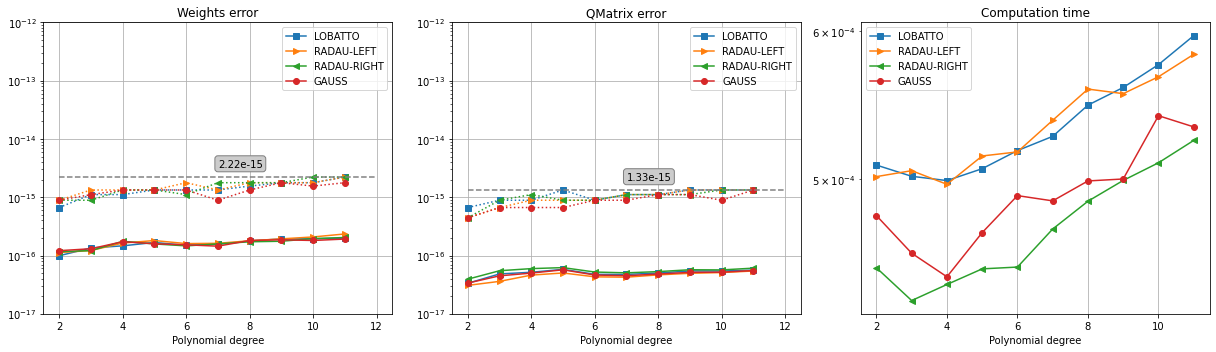

In [11]:
quad.plotQuadErrors('LEGENDRE', 'FEJER')